In [1]:
from fastai import *
from fastai.vision import *

In [12]:

folder = 'bored'
file = 'urls_bored.txt'

In [16]:

folder = 'surprise'
file = 'urls_surprise.txt'

In [21]:
folder = "angry"
file = "urls_angry.txt"

In [2]:

folder = 'happy'
file = 'urls_happy.txt'

In [3]:
path = Path('data/emotion')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [18]:
path.ls()

[WindowsPath('data/emotion/angry'),
 WindowsPath('data/emotion/bored'),
 WindowsPath('data/emotion/boring'),
 WindowsPath('data/emotion/happy'),
 WindowsPath('data/emotion/models'),
 WindowsPath('data/emotion/surprise')]

In [29]:
print(dest/file)

data\emotion\happy\urls_happy.txt


In [4]:
classes = ['bored','surprise','angry','happy']

In [23]:
path.ls()

[WindowsPath('data/emotion/angry'),
 WindowsPath('data/emotion/bored'),
 WindowsPath('data/emotion/boring'),
 WindowsPath('data/emotion/happy'),
 WindowsPath('data/emotion/models'),
 WindowsPath('data/emotion/surprise')]

In [28]:
download_images(dest/file,dest, max_pics=500)

In [5]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

bored


surprise


angry


happy


In [6]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [7]:
data.classes

['angry', 'bored', 'happy', 'surprise']

In [ ]:
np.zeros(shape=(48,48))

In [ ]:
data.show_batch(rows=3, figsize=(20,20))

In [8]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [9]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,error_rate,time
0,2.171178,1.488292,0.446809,04:08
1,1.676255,1.383441,0.420213,04:13
2,1.420366,1.319890,0.404255,04:15


In [16]:
learn.save('stage-3')

In [ ]:
learn.load('stage-1')

In [37]:
learn.unfreeze()

In [11]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


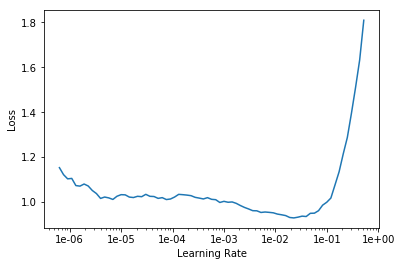

In [12]:
# learn.lr_find(start_lr=1e-5, end_lr=1e-1)
learn.recorder.plot()

In [13]:
interp = ClassificationInterpretation.from_learner(learn)

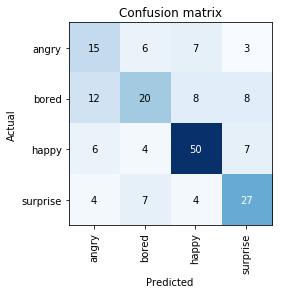

In [14]:
interp.plot_confusion_matrix()

In [29]:
print("【未清資料後的第二次準確率v1.2】")
print("憤怒:"+str(round(44/(14+44+11+22),2)*100)+"%")
print("無聊:"+(str(round(37/(20+37+14+15),2)*100))+"%")
print("開心:"+str(round(57/(8+20+57+7),2)*100)+"%")
print("驚訝:"+str(round(51/(16+22+8+51),2)*100)+"%")
print("整體:"+str(round((44+37+57+51)/(14+44+11+22+20+37+14+15+8+20+57+7+16+22+8+51),2)*100)+'%')

【未清資料後的第二次準確率v1.2】
憤怒:48.0%
無聊:43.0%
開心:62.0%
驚訝:53.0%
整體:52.0%


In [21]:
(15+20+50+27)/(15+6+7+3+12+20+8+8+6+4+50+7+4+7+4+27+15+20+50+27)

0.37333333333333335

## 第二次訓練

In [17]:
learn.fit_one_cycle(3, max_lr=slice(1e-4,1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,0.973643,1.548630,0.452128,04:26
1,1.025649,1.539528,0.430851,04:45
2,0.918453,1.392443,0.409574,04:25


In [18]:
learn.save('stage-4')

In [19]:
learn.unfreeze()

In [20]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


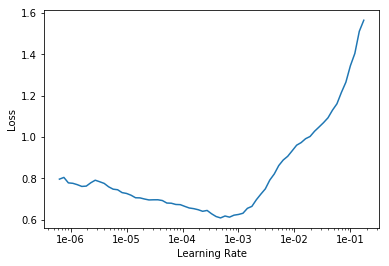

In [23]:
# learn.lr_find(start_lr=1e-5, end_lr=1e-1)
learn.recorder.plot()

In [24]:
interp = ClassificationInterpretation.from_learner(learn)

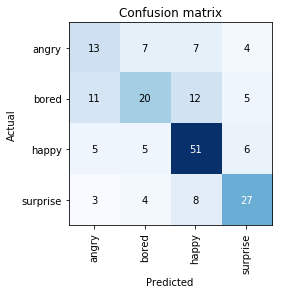

In [25]:
interp.plot_confusion_matrix()

In [67]:
print("憤怒:"+str(round(44/(44+14+11+22),2)*100)+"%")
print("無聊:"+(str(round(37/(20+37+14+15),2)*100))+"%")
print("開心:"+str(round(57/(8+20+57+7),2)*100)+"%")
print("驚訝:"+str(round(51/(16+22+8+51),2)*100)+"%")
print("整體:"+str(round((44+37+57+51)/(44+14+11+22+20+37+14+15+8+20+57+7+16+22+8+51+44+20+57+51),2)*100)+'%')

憤怒:48.0%
無聊:43.0%
開心:62.0%
驚訝:53.0%
整體:35.0%


In [41]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


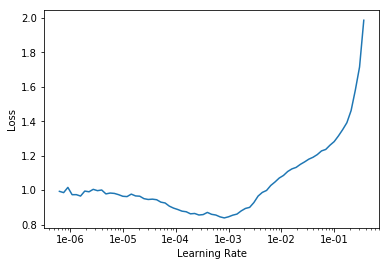

In [43]:
# learn.lr_find(start_lr=1e-5, end_lr=1e-1)
learn.recorder.plot()

In [44]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_confusion_matrix()